In [273]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [259]:
data_set = pd.read_csv('creditcard.csv').drop(columns=['Time'])
data_set.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [260]:
data_set.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [261]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [262]:
data_set = data_set.sample(frac = 1)
data_set.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142584,-1.126795,-0.051804,1.511338,-1.707821,-2.158117,0.146625,-1.652068,0.997836,-1.859255,0.520562,...,-0.028232,0.176613,0.086064,0.061306,-0.248820,-0.225866,-0.352354,-0.073897,22.00,0
3897,-1.079832,0.127237,2.996395,1.347202,-0.776858,0.882038,-0.422409,0.411149,0.543388,-0.476686,...,0.272092,1.019618,-0.274124,0.127874,0.184017,0.011206,0.070464,0.120886,80.18,0
192923,-0.434394,1.553436,-0.355604,0.986624,0.610502,-0.867229,1.020506,0.162809,-0.765112,-0.205001,...,0.141582,0.613280,-0.261693,-0.076076,0.043384,-0.366698,0.315478,0.178902,1.00,0
16116,1.327766,0.226721,0.092547,0.385110,0.018708,-0.414002,0.051169,-0.148672,0.095111,-0.068678,...,-0.321065,-0.920440,0.009148,-0.624603,0.355159,0.156351,-0.029904,0.009394,3.56,0
180279,-0.221757,1.062094,0.042356,-0.557934,1.341920,-0.049578,0.958503,0.020971,-0.790466,-0.910689,...,-0.231290,-0.638123,-0.102001,0.148425,-0.424471,0.217722,0.100007,0.168109,1.98,0


In [263]:
x = data_set.iloc[:, data_set.columns != 'Class']
y = data_set.iloc[:, data_set.columns == 'Class']

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)

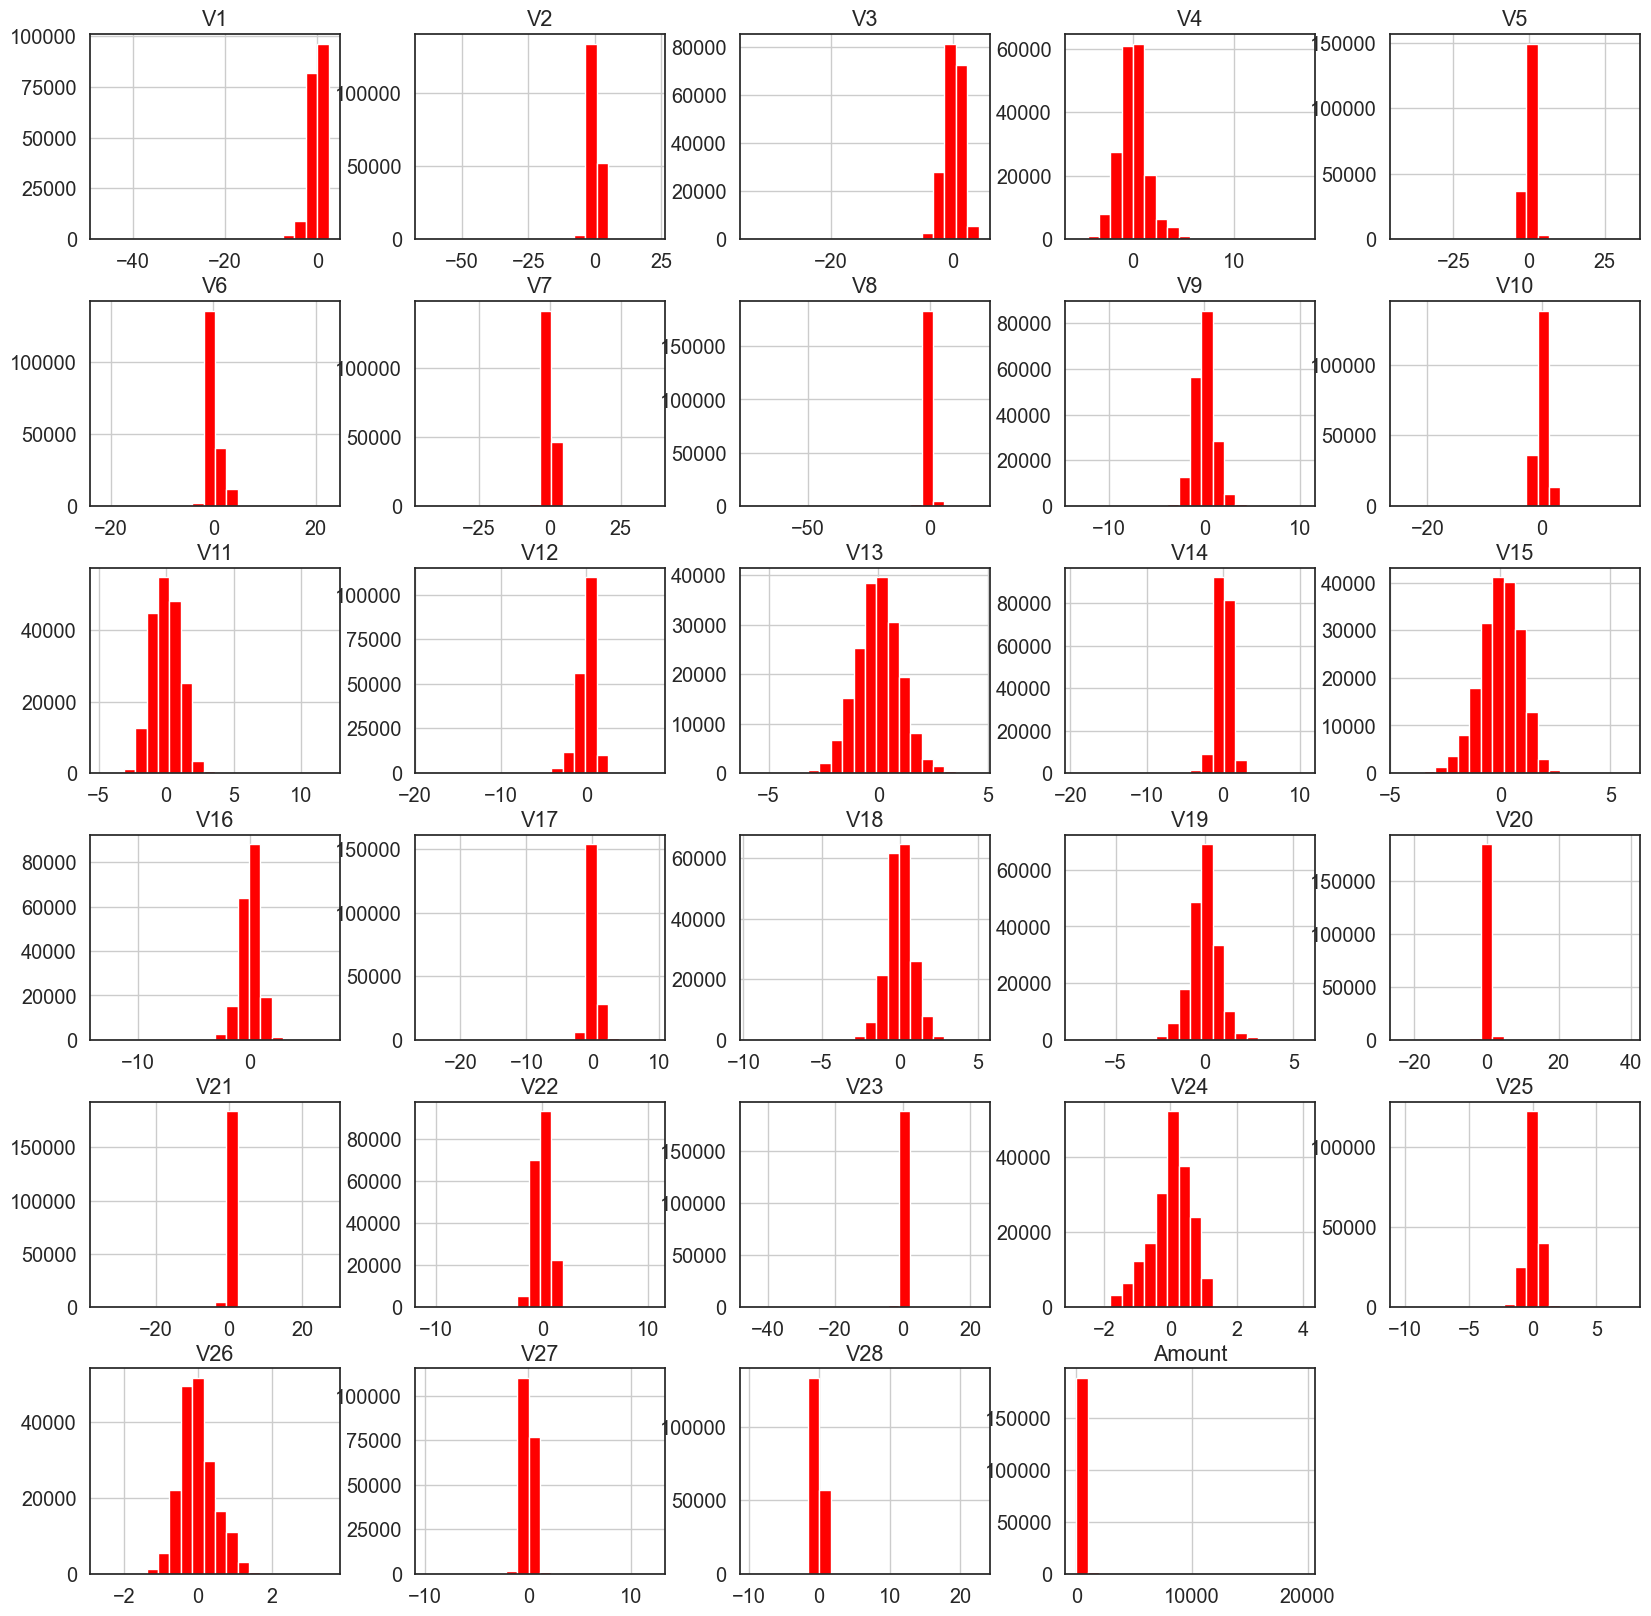

In [265]:
#Before normalize
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=x_train.hist(bins=20,color='red' )

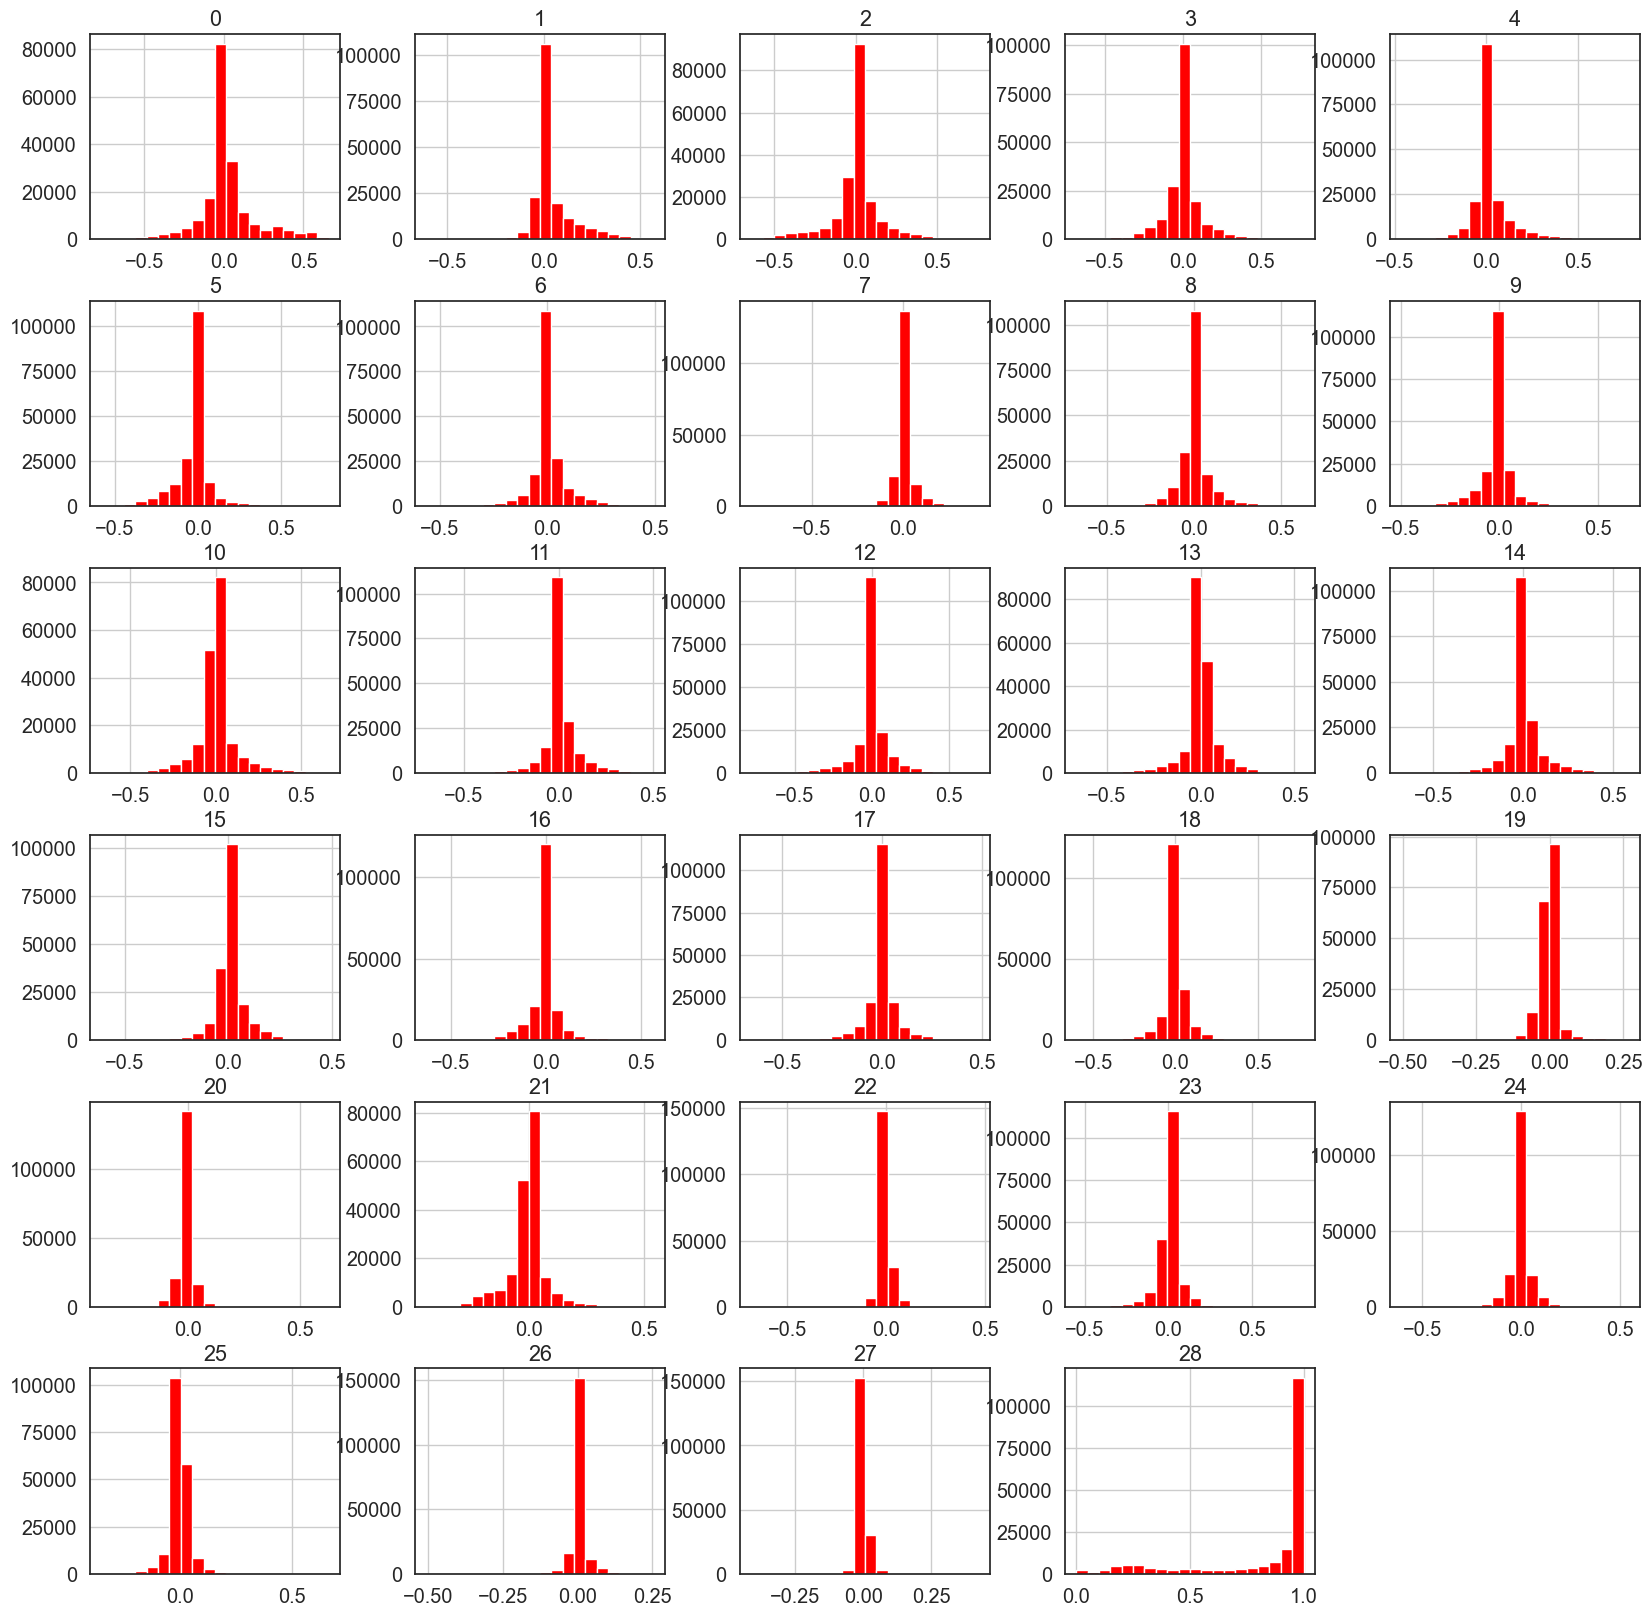

In [266]:
#After normalize
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=pd.DataFrame(data=x_train_norm).hist(bins=20,color='red')

## Find Best iteration

In [267]:
stop = 11

test_result = []
train_result = []
xpoints = np.asanyarray(range(1,stop))

for it in range(1,stop):

    kmeans = KMeans(n_clusters = 2, random_state = 0, n_init=it)
    kmeans.fit(x_train_norm)

    pred = kmeans.fit_predict(x_train_norm)
    train_result.append(accuracy_score(y_train, pred) * 100)


    pred = kmeans.predict(x_test_norm)
    test_result.append(accuracy_score(y_test, pred) * 100)

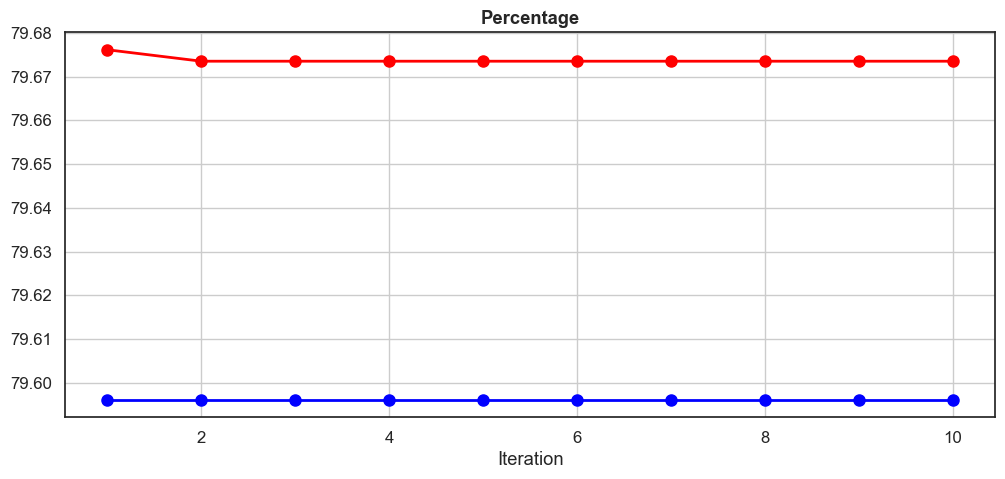

In [268]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.plot(range(1,len(train_result)+1), train_result, marker='o',lw=2,ms=8,color='red')
plt.plot(range(1,len(test_result)+1), test_result, marker='o',lw=2,ms=8,color='blue')
plt.xlabel('Iteration')
plt.title('Percentage',fontweight='bold')
plt.grid(True)

In [274]:
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init=10)
kmeans.fit(x_train_norm)

KMeans(n_clusters=2, n_init=10, random_state=0)

/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


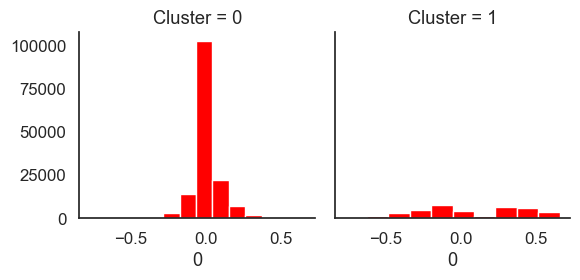

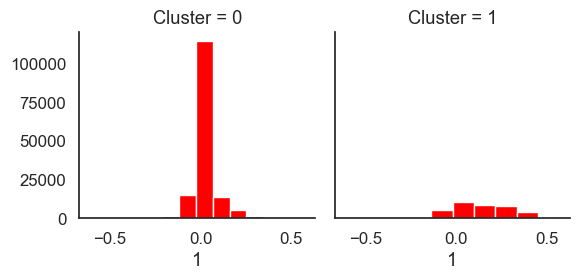

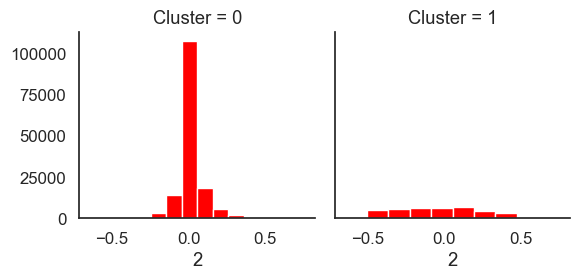

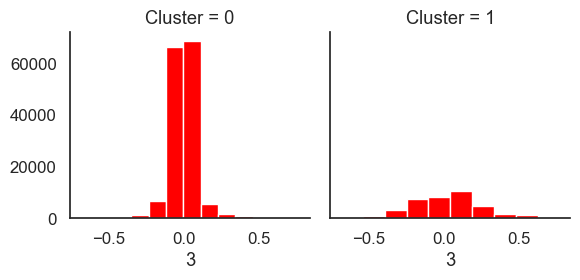

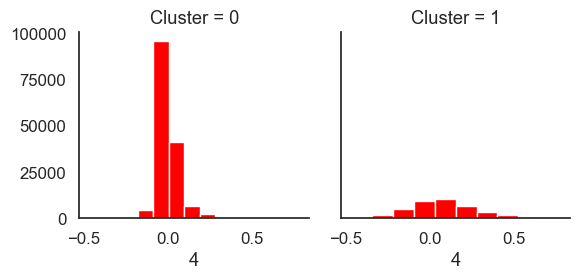

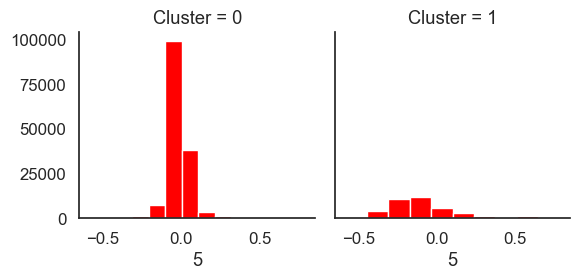

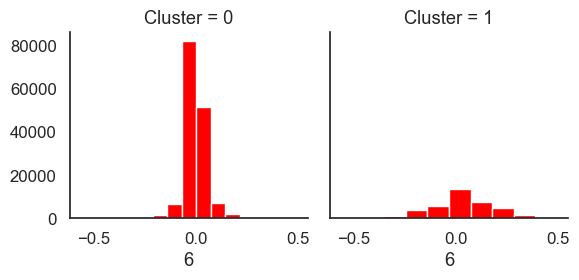

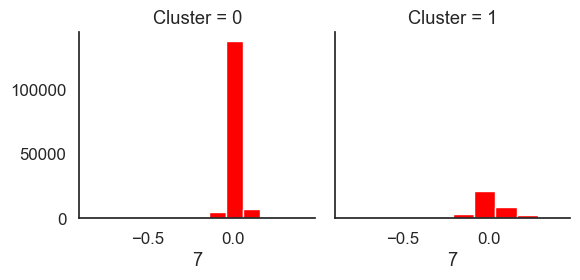

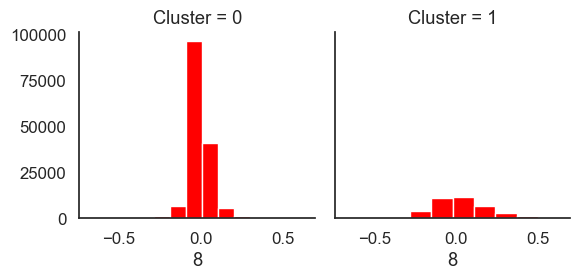

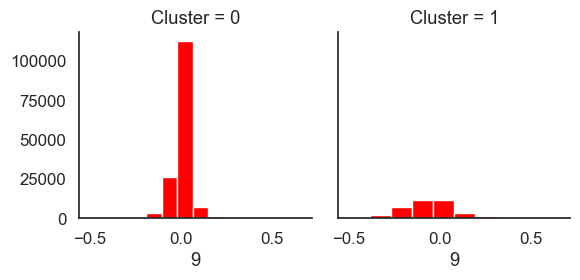

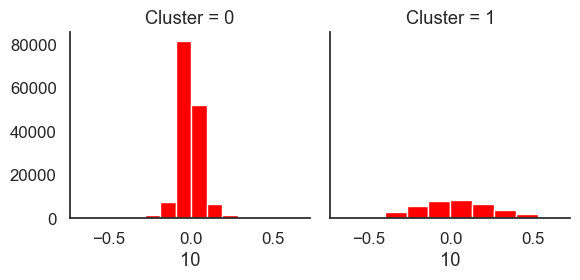

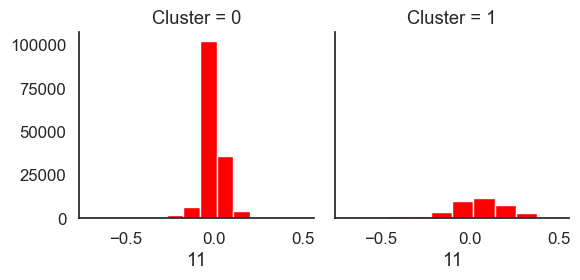

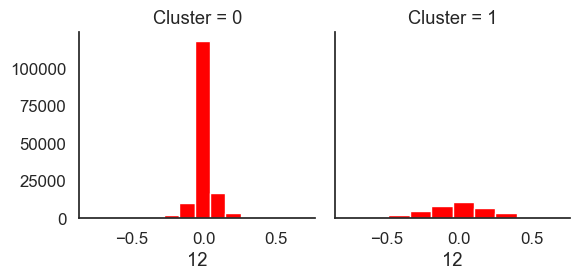

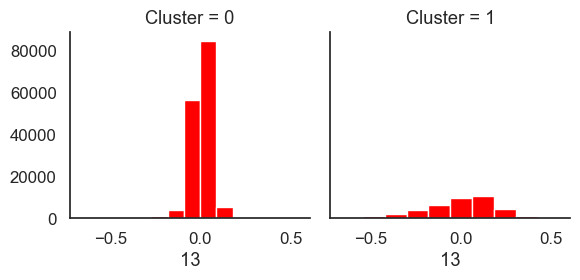

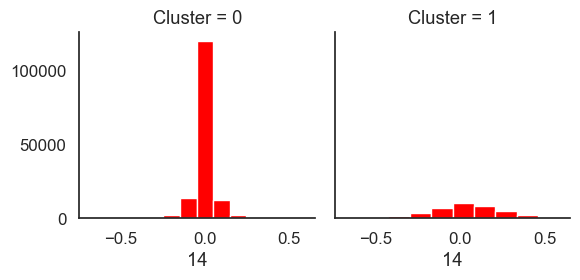

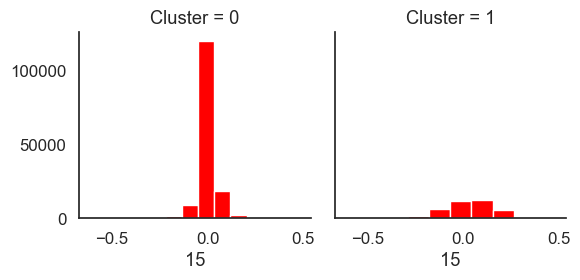

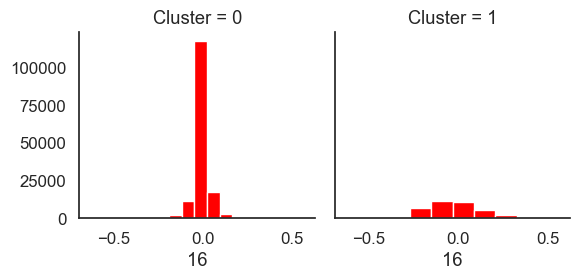

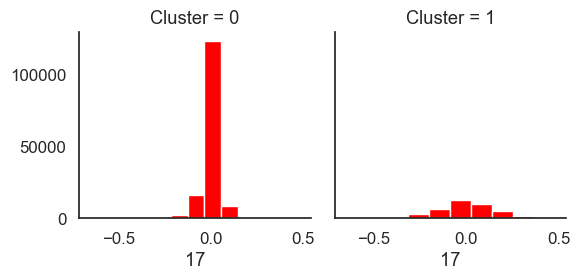

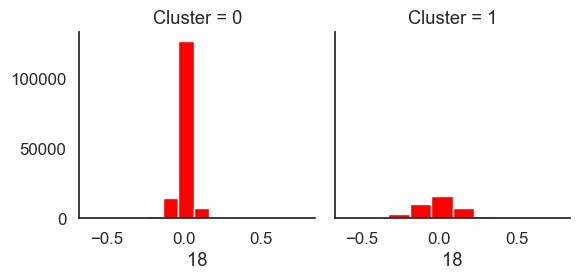

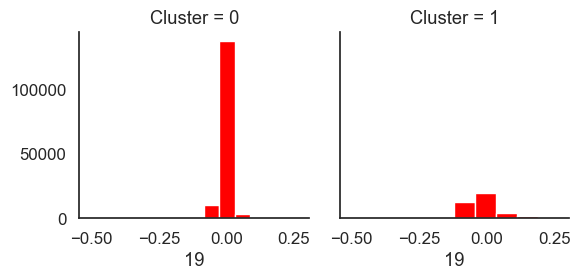

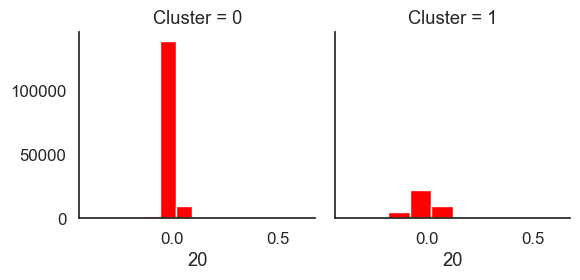

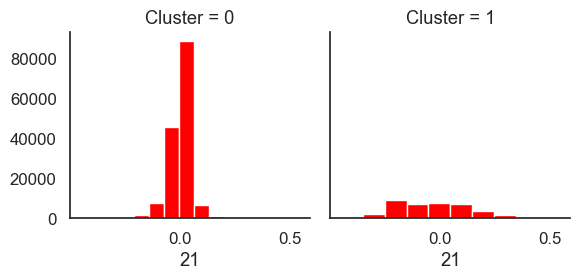

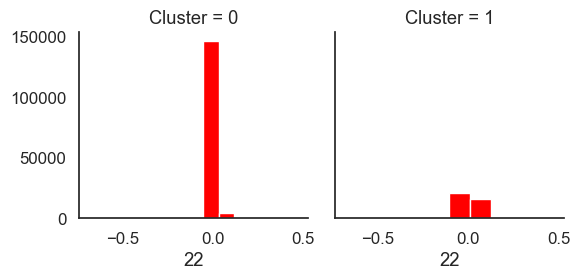

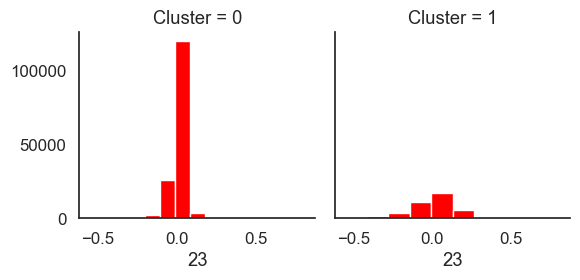

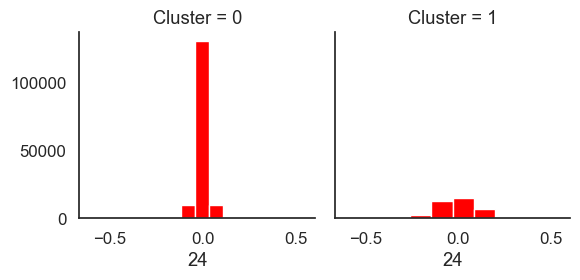

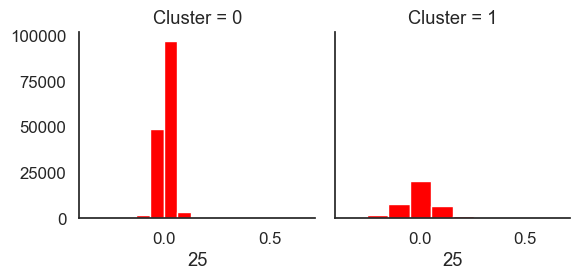

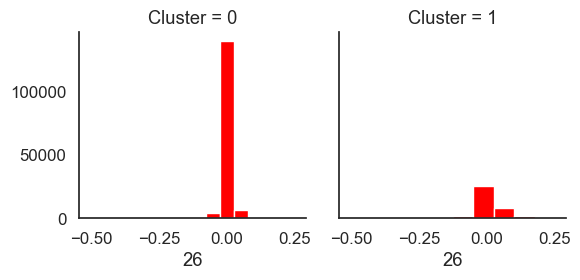

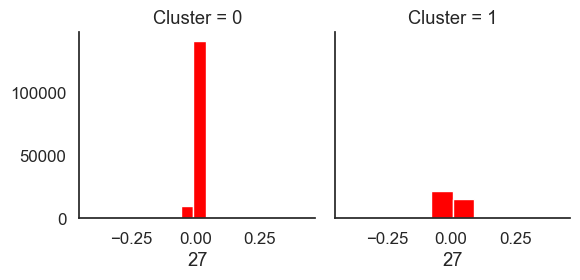

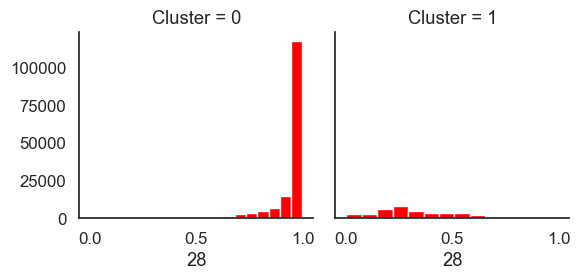

In [270]:
data_show=pd.DataFrame(data=x_train_norm).copy()
data_show['Cluster']=kmeans.labels_

aux=data_show.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data_show, col='Cluster')
    grid.map(plt.hist, cluster,color='red')

In [275]:

## Accuracy in train data
pred = kmeans.fit_predict(x_train_norm)
print(accuracy_score(y_train, pred) * 100)

79.67351430667645


In [272]:
## Accuracy in test data
pred = kmeans.predict(x_test_norm)
print(accuracy_score(y_test, pred))

79.59611435624076
